### Initial setup

In [2]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

#%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

<br>

### Helper function to save figures

In [3]:
# Where to save the figures
PROJECT_ROOT_DIR = "/home/clinton/Projects/ML/california-housing-prices"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

<br>

### Getting data

In [4]:
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("data")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(HOUSING_PATH, "housing.csv")
  return pd.read_csv(csv_path)

housing = load_housing_data()

/home/clint/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<br>

### Preview Data 

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show>

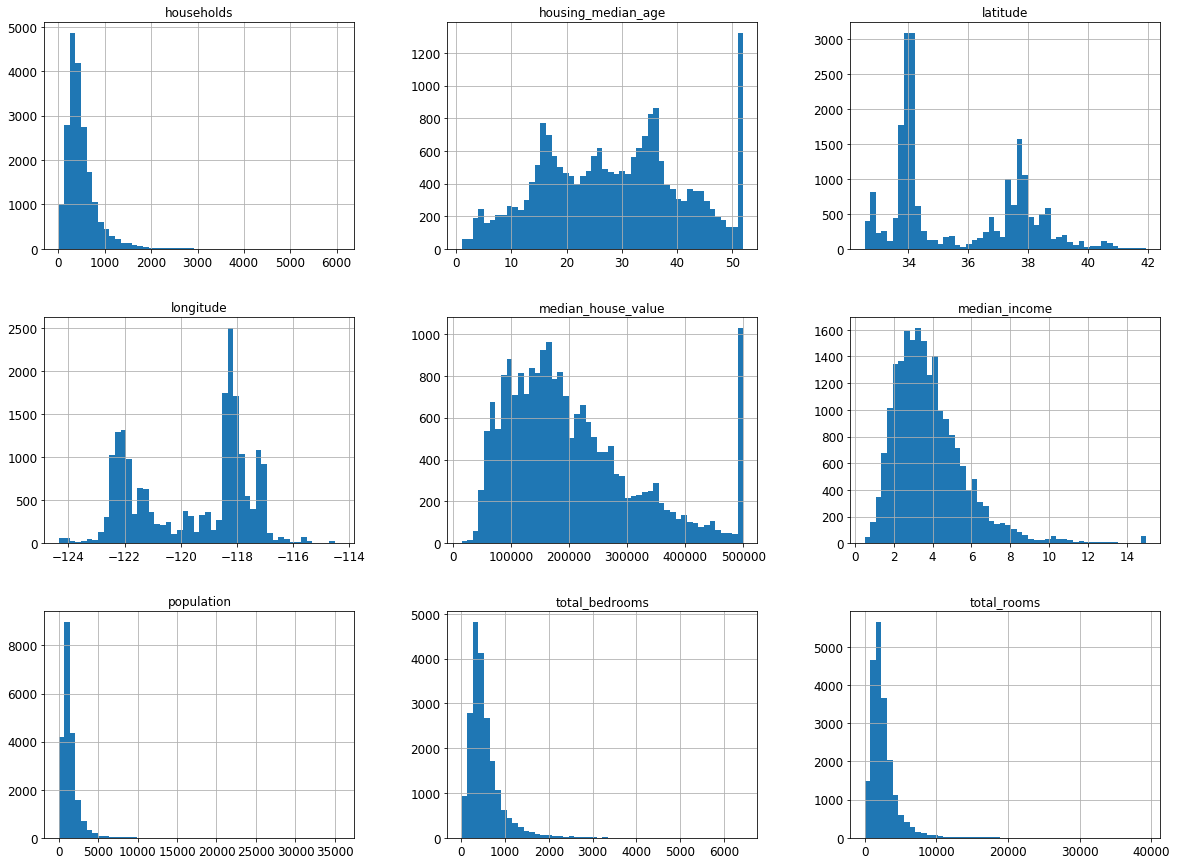

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show

In [10]:
import numpy as np

def split_train_test(data, test_ratio):
    length = len(data)
    shuffled_indices = np.random.permutation(length)
    test_set_size = int(test_ratio * length)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)
print ("Length of train set ", len(train_set), ", Length of test set: ", len(test_set))

Length of train set  16512 , Length of test set:  4128


In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

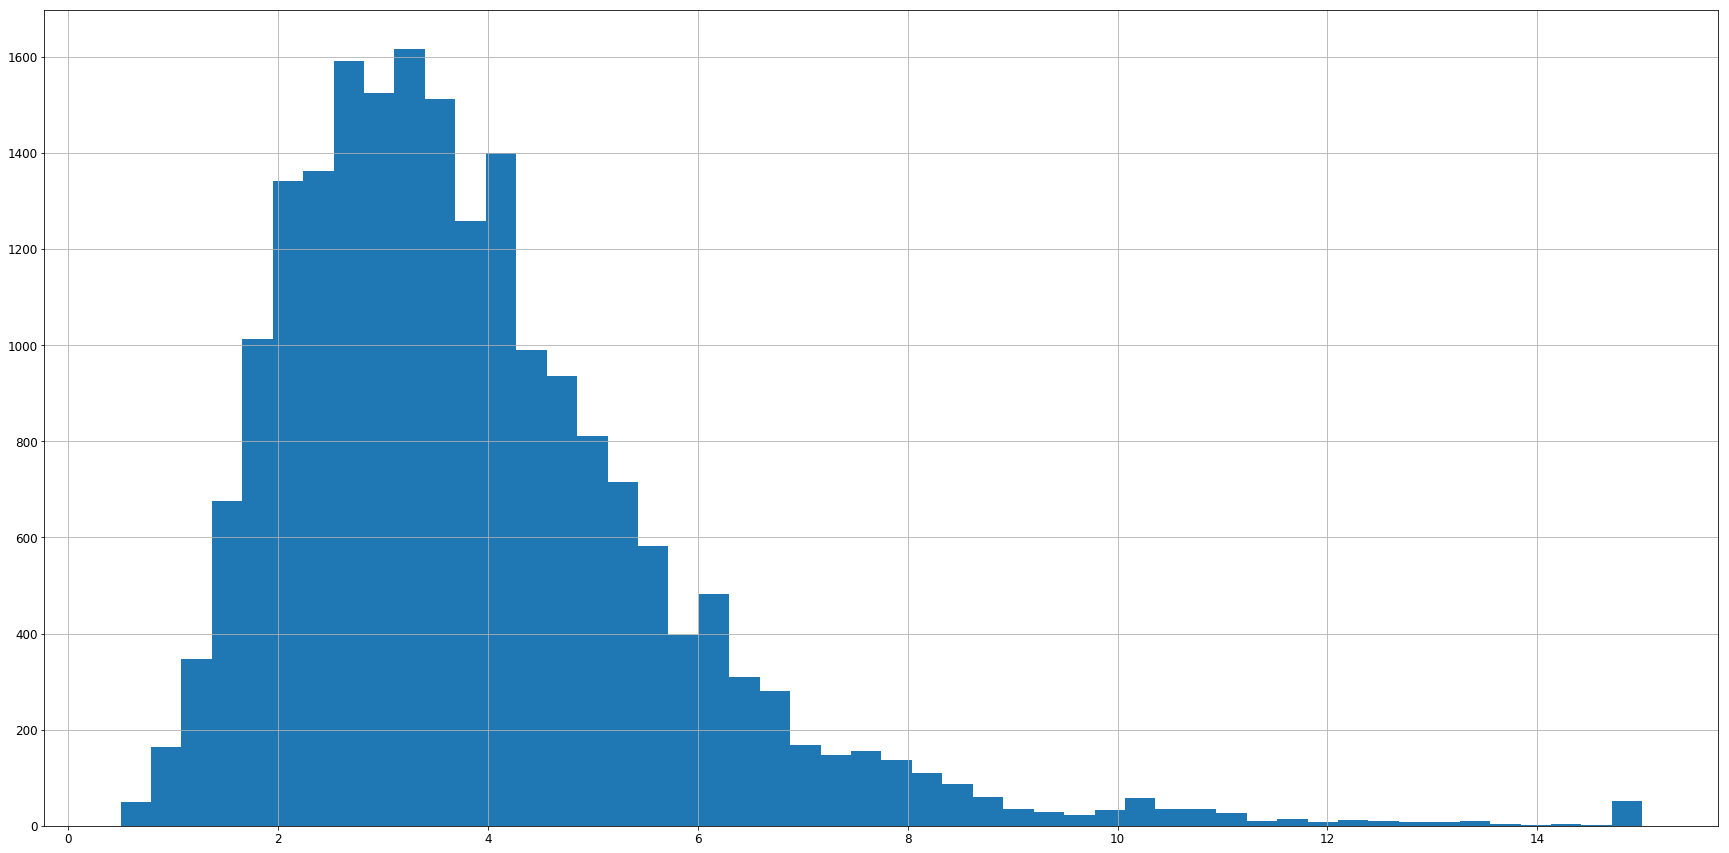

In [14]:
housing_with_id['median_income'].hist(bins=50, figsize=(30, 15))

In [15]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] > 5, 5.0, inplace=True)

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

/home/clint/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [17]:
housing['income_cat'].value_counts() / len(housing)

5.0     0.954506
6.0     0.025775
7.0     0.009157
8.0     0.005087
9.0     0.002422
11.0    0.002374
10.0    0.000678
Name: income_cat, dtype: float64

In [18]:
for set in (strat_train_set, strat_test_set):
    set.drop("income_cat", axis=1, inplace=True)

/home/clint/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<br>

### Visualize data to gain more understanding

In [19]:
housing = strat_train_set.copy()

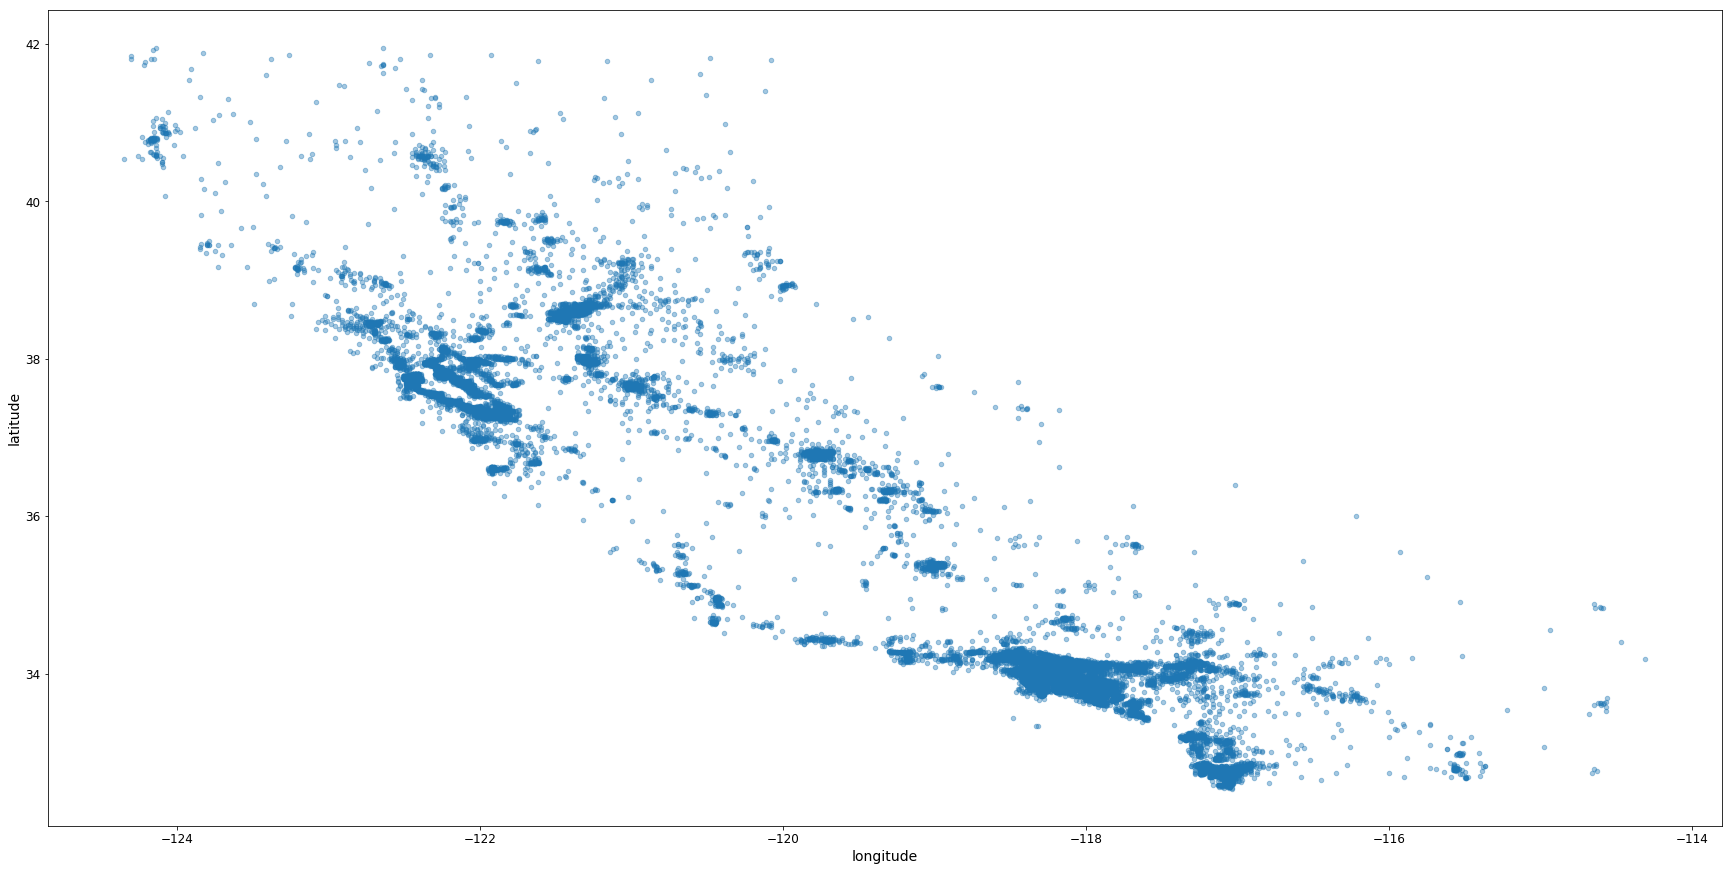

In [20]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(30, 15), alpha=0.4)

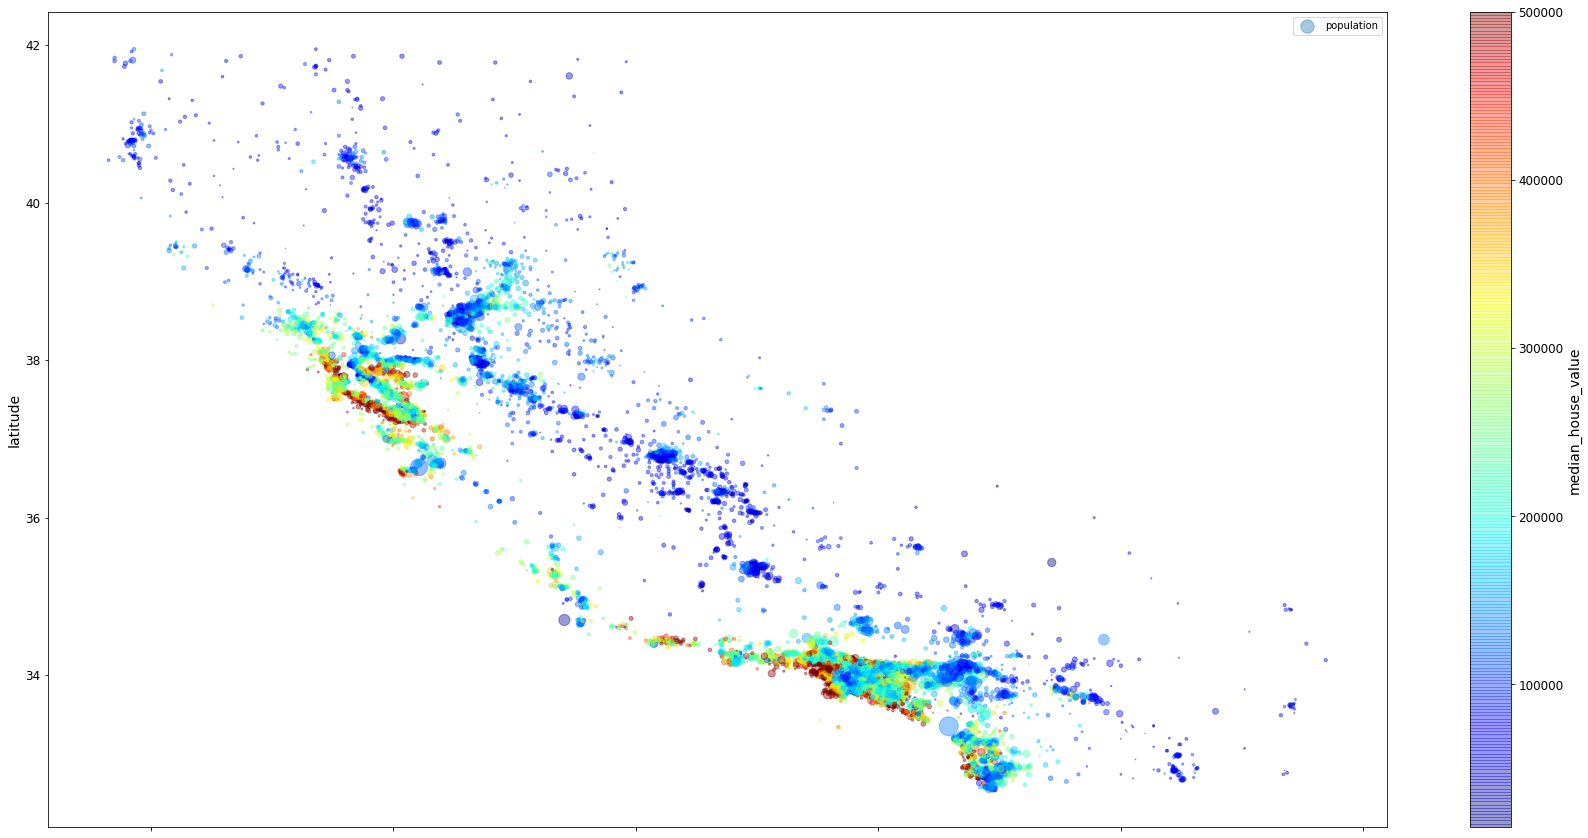

In [21]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(30, 15), alpha=0.4, s=housing['population']/100, label='population', c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

<br>

### Looking for correlations

In [22]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686214
total_rooms           0.132777
housing_median_age    0.104035
households            0.065741
total_bedrooms        0.050092
population           -0.024797
longitude            -0.050312
latitude             -0.140169
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7213bc048>,
      dtype=object)

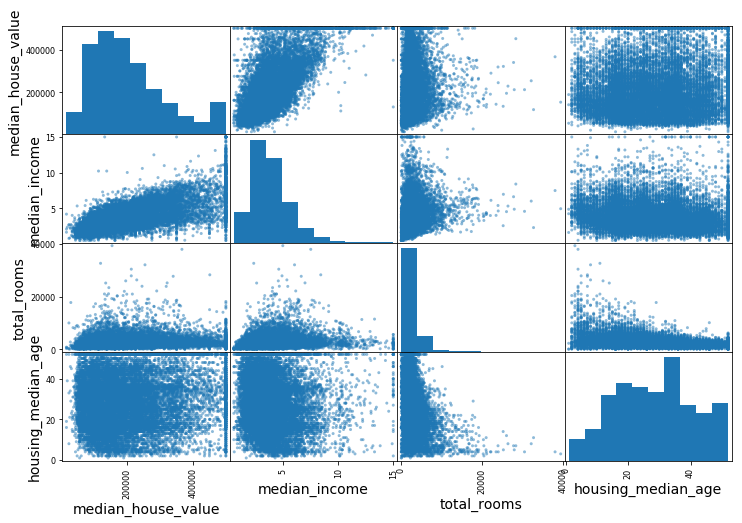

In [23]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

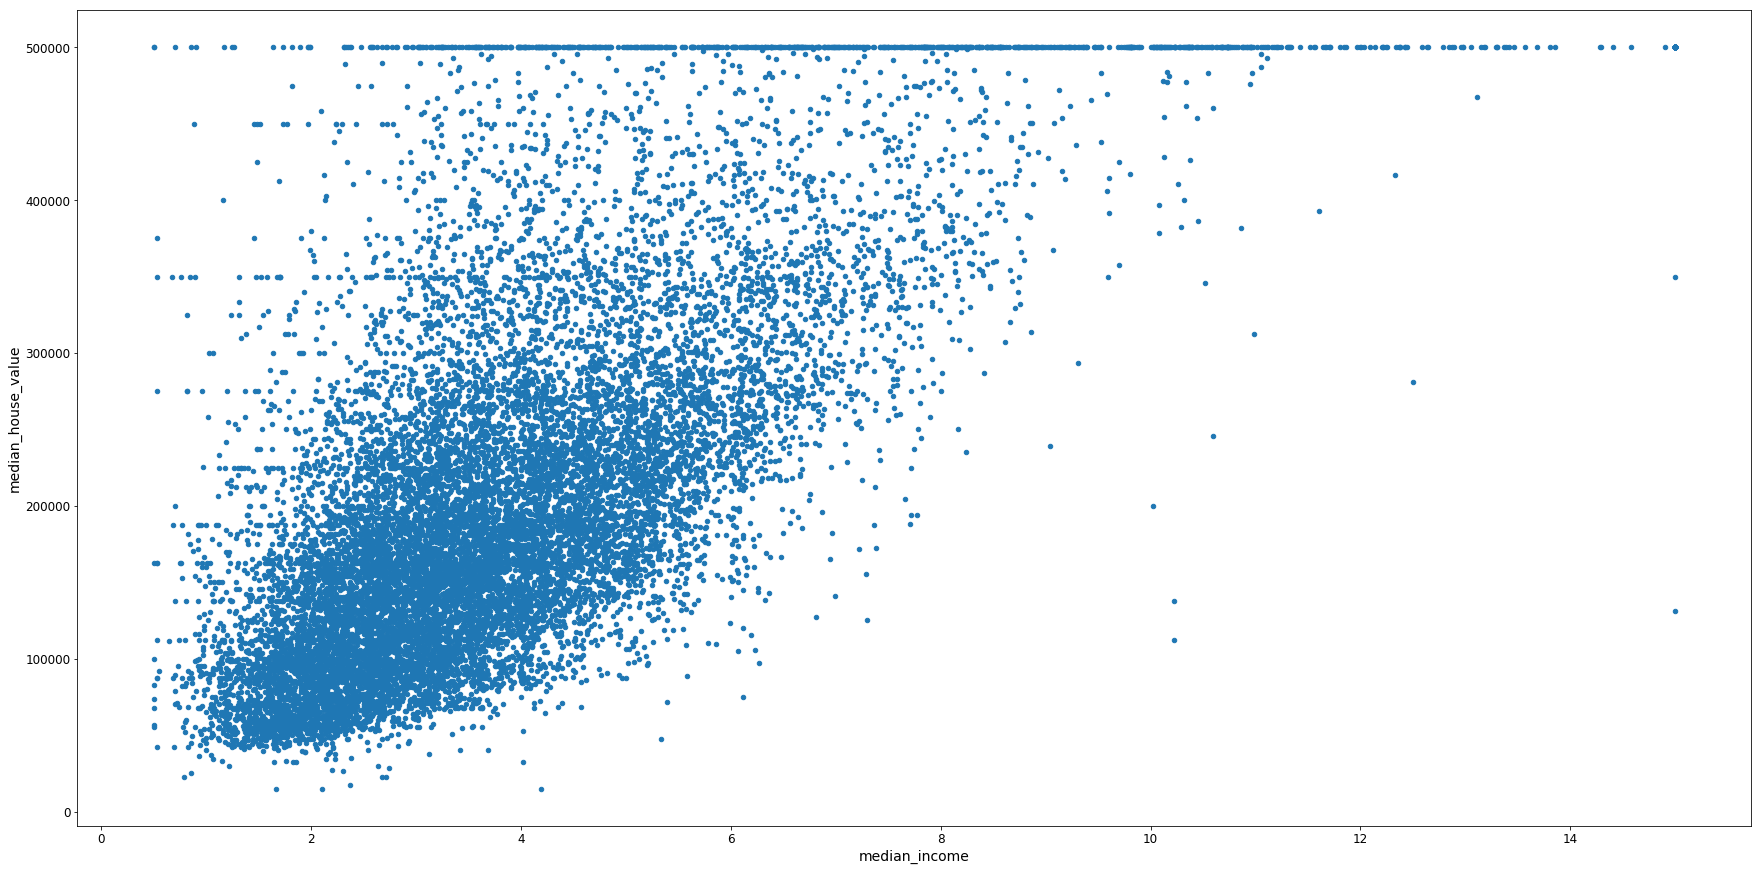

In [24]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(30, 15))

Let's combine some variables to see if we can improve their correlation

In [25]:
housing['room_per_household'] = housing['total_rooms'] / housing['total_bedrooms']
housing['population_per_household'] = housing['population'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']

corr_matrix = housing.corr()
corr_matrix['median_house_value']

longitude                  -0.050312
latitude                   -0.140169
housing_median_age          0.104035
total_rooms                 0.132777
total_bedrooms              0.050092
population                 -0.024797
households                  0.065741
median_income               0.686214
median_house_value          1.000000
room_per_household          0.382255
population_per_household   -0.020748
bedrooms_per_room          -0.253415
Name: median_house_value, dtype: float64

<br>

### Fixing null columns

In [26]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [27]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6421,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,INLAND
7547,-118.20,33.92,45.0,1283.0,NaN,1025.0,248.0,3.2798,<1H OCEAN
9622,-120.32,37.29,38.0,576.0,NaN,478.0,112.0,2.3382,INLAND
16105,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,NEAR OCEAN
3778,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN


In [28]:
#Option 1: Drop entire variables if contains null
sample_incomplete_rows.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [29]:
# Option 2: Drop entire attribute/column
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
6421,-117.99,34.14,30.0,2346.0,1988.0,474.0,2.5625,INLAND
7547,-118.20,33.92,45.0,1283.0,1025.0,248.0,3.2798,<1H OCEAN
9622,-120.32,37.29,38.0,576.0,478.0,112.0,2.3382,INLAND
16105,-122.50,37.75,44.0,1819.0,1137.0,354.0,3.4919,NEAR OCEAN
3778,-118.40,34.17,24.0,6347.0,2945.0,1492.0,3.3545,<1H OCEAN


In [30]:
# Option 3: Using an median (imputer)
median = housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6421,-117.99,34.14,30.0,2346.0,433.5,1988.0,474.0,2.5625,INLAND
7547,-118.20,33.92,45.0,1283.0,433.5,1025.0,248.0,3.2798,<1H OCEAN
9622,-120.32,37.29,38.0,576.0,433.5,478.0,112.0,2.3382,INLAND
16105,-122.50,37.75,44.0,1819.0,433.5,1137.0,354.0,3.4919,NEAR OCEAN
3778,-118.40,34.17,24.0,6347.0,433.5,2945.0,1492.0,3.3545,<1H OCEAN


In [31]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')

In [32]:
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [33]:
imputer.statistics_

array([-118.49  ,   34.255 ,   29.    , 2125.    ,  433.5   , 1165.    ,
        409.    ,    3.5296])

In [34]:
housing_num.median().values

array([-118.49  ,   34.255 ,   29.    , 2125.    ,  433.5   , 1165.    ,
        409.    ,    3.5296])

In [35]:
X = imputer.transform(housing_num)

house_trs = pd.DataFrame(X, columns=housing_num.columns, index=housing.index.values)
house_trs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16659,-120.67,35.30,32.0,4202.0,986.0,2309.0,956.0,2.2165
19735,-121.80,40.34,26.0,4815.0,910.0,1341.0,539.0,2.8810
1566,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001
16430,-121.35,38.09,32.0,1706.0,292.0,923.0,284.0,5.5057
9111,-118.15,34.59,33.0,2111.0,429.0,1067.0,397.0,3.7344


<br>

### Handling Categorical Data

In [36]:
from future_encoders import OrdinalEncoder 

encoder = OrdinalEncoder()
housing_cat = housing[['ocean_proximity']]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[4.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [37]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [38]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_hot = encoder.fit_transform(housing_cat)
housing_cat_hot

array([[0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

<br>

### Custom Transformers

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttrAdder(BaseEstimator, TransformerMixin):
        
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
            
    def fit(self, X, y=None):
        return self # Nothing to do more
        
    def transform(self, X, y=None):
        room_per_household = X[:, rooms_ix] / X[:, bedrooms_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, room_per_household, population_per_household, bedrooms_per_room]
        return np.c_[X, room_per_household, population_per_household]

attr_adder = CombinedAttrAdder(add_bedrooms_per_room=False)
housing_extra_attr = attr_adder.transform(housing.values)

housing_extra_attr = pd.DataFrame(housing_extra_attr, columns=list(housing.columns) + ["room_per_household", "population_per_household"])
housing_extra_attr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,room_per_household,population_per_household
0,-120.67,35.3,32,4202,986,2309,956,2.2165,NEAR OCEAN,4.26166,2.41527
1,-121.8,40.34,26,4815,910,1341,539,2.881,INLAND,5.29121,2.48794
2,-121.96,37.74,2,200,20,25,9,15.0001,<1H OCEAN,10,2.77778
3,-121.35,38.09,32,1706,292,923,284,5.5057,INLAND,5.84247,3.25
4,-118.15,34.59,33,2111,429,1067,397,3.7344,INLAND,4.92075,2.68766


<br>

### Using Pipelines

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imupter', Imputer(strategy='median')),
    ('attrs_adder', CombinedAttrAdder()),
    ('std_scaller', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-5.50214296e-01, -1.52554734e-01,  2.67896442e-01, ...,
        -5.90293542e-01, -6.10223676e-02,  3.09900007e-01],
       [-1.11427484e+00,  2.21291300e+00, -2.07672665e-01, ...,
         2.41299866e-01, -5.41865727e-02, -3.74804330e-01],
       [-1.19414182e+00,  9.92632026e-01, -2.10994909e+00, ...,
         4.04472546e+00, -2.69221759e-02, -1.70938890e+00],
       ...,
       [-1.15420833e+00,  8.51830375e-01, -9.21026325e-01, ...,
         3.46462818e-01,  4.18184423e-02, -4.42869058e-01],
       [ 6.37807022e-01, -7.72081998e-01,  1.37755769e+00, ...,
        -1.02242564e+00,  2.87013483e-03,  8.15076251e-01],
       [-6.30081275e-01,  1.00671219e+00, -6.83241772e-01, ...,
        -5.91196082e-01, -3.90944534e-02,  3.10822893e-01]])

In [ ]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attributes):
        self.attributes = attributes
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values